In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [412]:
#1.a)

In [574]:
d1=pd.read_csv('indicator_estimated_prevalence_150.csv')

In [414]:
d1

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,class
0,Slovakia,55,56,59,59,56,51,46,42,38,35,32,30,29,26,25,21,20,20,1
1,Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,2
2,Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,1
3,Oman,40,36,29,25,22,22,15,15,14,14,13,14,13,13,12,13,13,14,1
4,Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Senegal,380,379,379,378,377,376,372,388,397,424,420,430,443,441,454,456,461,468,2
146,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387,0
147,Suriname,109,100,79,80,76,78,88,101,118,122,115,113,113,120,126,136,146,155,1
148,Pakistan,430,428,427,426,424,422,421,421,415,420,413,406,376,355,333,289,260,223,2


In [415]:
d1.shape

(150, 20)

There are 150 rows and 20 columns in the dataset

In [416]:
d1.isnull().sum()

TB prevalence, all forms (per 100 000 population per year)    0
1990                                                          0
1991                                                          0
1992                                                          0
1993                                                          0
1994                                                          0
1995                                                          0
1996                                                          0
1997                                                          0
1998                                                          0
1999                                                          0
2000                                                          0
2001                                                          0
2002                                                          0
2003                                                          0
2004                                    

In [417]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
TB prevalence, all forms (per 100 000 population per year)    150 non-null object
1990                                                          150 non-null object
1991                                                          150 non-null object
1992                                                          150 non-null object
1993                                                          150 non-null object
1994                                                          150 non-null object
1995                                                          150 non-null object
1996                                                          150 non-null int64
1997                                                          150 non-null int64
1998                                                          150 non-null int64
1999                                                          150 non-null int

In [418]:
num_col = ['int16','int32','int64','float16','float32','float64']

#Filter out variables with numeric datatypes
df_numcols_only= d1.select_dtypes(include= num_col)

In [419]:
#Numerical

In [420]:
df_numcols_only.columns

Index(['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       'class'],
      dtype='object')

In [421]:
#Categorical

In [422]:
cat_col=['object']
df_catcols_only=d1.select_dtypes(include=cat_col)

In [423]:
df_catcols_only.columns

Index(['TB prevalence, all forms (per 100 000 population per year)', '1990',
       '1991', '1992', '1993', '1994', '1995', '2004', '2005', '2006', '2007'],
      dtype='object')

In [424]:
df_numcols_only.drop('class',axis=1,inplace=True)

C:\Users\Manoj\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [425]:
df_numcols_only.columns

Index(['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003'], dtype='object')

In [426]:
#1.b)

In [427]:
d1.describe()

,1996,1997,1998,1999,2000,2001,2002,2003,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,183.493333,185.880000,183.573333,186.826667,184.520000,185.500000,186.553333,184.326667,1.166667
std,192.801033,193.767865,189.695989,197.930933,202.723329,209.753795,210.561363,215.452777,0.560640
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,34.250000,30.750000,30.250000,28.500000,27.000000,25.250000,26.250000,24.250000,1.000000
50%,91.000000,93.000000,89.500000,90.500000,87.500000,82.000000,81.000000,71.500000,1.000000
75%,319.500000,329.250000,337.750000,348.500000,342.500000,343.750000,354.750000,347.500000,1.750000
max,910.000000,853.000000,698.000000,701.000000,761.000000,832.000000,932.000000,960.000000,2.000000


In [428]:
#1.c)

In [429]:
d1['TB prevalence, all forms (per 100 000 population per year)'].value_counts(normalize=True)

Israel                              0.006667
Moldova                             0.006667
Lebanon                             0.006667
Brazil                              0.006667
Laos                                0.006667
                                      ...   
Slovakia                            0.006667
Nauru                               0.006667
Saint Vincent and the Grenadines    0.006667
Antigua and Barbuda                 0.006667
Chad                                0.006667
Name: TB prevalence, all forms (per 100 000 population per year), Length: 150, dtype: float64

In [430]:
d1['1990'].value_counts(normalize=True)

10     0.026667
14     0.026667
88     0.020000
42     0.020000
105    0.013333
         ...   
377    0.006667
143    0.006667
292    0.006667
206    0.006667
91     0.006667
Name: 1990, Length: 122, dtype: float64

In [431]:
d1['1991'].value_counts(normalize=True)*100

10     3.333333
15     2.666667
64     2.666667
45     2.000000
93     2.000000
         ...   
87     0.666667
477    0.666667
56     0.666667
403    0.666667
573    0.666667
Name: 1991, Length: 118, dtype: float64

In [432]:
d1['1992'].value_counts(normalize=True)*100

9      2.666667
17     2.000000
59     2.000000
86     2.000000
7      2.000000
         ...   
402    0.666667
135    0.666667
52     0.666667
69     0.666667
129    0.666667
Name: 1992, Length: 122, dtype: float64

In [433]:
d1['1993'].value_counts(normalize=True)*100

9      3.333333
43     3.333333
7      2.666667
14     2.000000
37     1.333333
         ...   
355    0.666667
262    0.666667
555    0.666667
239    0.666667
78     0.666667
Name: 1993, Length: 116, dtype: float64

In [434]:
d1['1994'].value_counts(normalize=True)*100

42     2.666667
25     2.000000
10     2.000000
9      2.000000
8      2.000000
         ...   
377    0.666667
376    0.666667
143    0.666667
64     0.666667
78     0.666667
Name: 1994, Length: 118, dtype: float64

In [435]:
d1['1995'].value_counts(normalize=True)*100

8      2.666667
22     2.666667
68     2.000000
7      2.000000
6      2.000000
         ...   
928    0.666667
275    0.666667
346    0.666667
370    0.666667
398    0.666667
Name: 1995, Length: 121, dtype: float64

In [436]:
d1['2004'].value_counts(normalize=True)*100

6      6.000000
71     2.000000
9      2.000000
10     2.000000
5      2.000000
         ...   
211    0.666667
8      0.666667
134    0.666667
229    0.666667
18     0.666667
Name: 2004, Length: 114, dtype: float64

In [437]:
d1['2005'].value_counts(normalize=True)*100

6      5.333333
5      3.333333
8      2.000000
24     2.000000
4      2.000000
         ...   
565    0.666667
32     0.666667
256    0.666667
227    0.666667
408    0.666667
Name: 2005, Length: 108, dtype: float64

In [438]:
d1['2006'].value_counts(normalize=True)*100

6        4.666667
5        3.333333
34       2.666667
18       2.000000
25       2.000000
           ...   
64       0.666667
1,093    0.666667
511      0.666667
621      0.666667
78       0.666667
Name: 2006, Length: 108, dtype: float64

In [439]:
d1['2007'].value_counts(normalize=True)*100

5      6.000000
6      4.000000
23     2.666667
39     2.000000
9      2.000000
         ...   
18     0.666667
568    0.666667
8      0.666667
41     0.666667
31     0.666667
Name: 2007, Length: 110, dtype: float64

In [440]:
#1.d)

In [441]:
d1.cov()

,1996,1997,1998,1999,2000,2001,2002,2003,class
1996,37172.238210,36943.724027,35563.601163,36401.602864,36696.688054,37464.832215,36788.161432,36722.388098,5.373602
1997,36943.724027,37545.985503,36349.203490,37127.213960,37530.780940,38370.691275,36934.227919,37750.583087,6.630872
1998,35563.601163,36349.203490,35984.568412,36833.147025,37538.290470,38345.838926,37051.579955,38127.603400,9.232662
1999,36401.602864,37127.213960,36833.147025,39176.654318,39546.761879,40586.140940,39557.881790,40540.312036,12.774049
2000,36696.688054,37530.780940,37538.290470,39546.761879,41096.747919,42222.986577,40833.274094,42232.835705,11.912752
2001,37464.832215,38370.691275,38345.838926,40586.140940,42222.986577,43996.654362,42512.298658,44081.963087,10.808725
2002,36788.161432,36934.227919,37051.579955,39557.881790,40833.274094,42512.298658,44336.087740,44307.831454,15.101790
2003,36722.388098,37750.583087,38127.603400,40540.312036,42232.835705,44081.963087,44307.831454,46419.899284,18.502237
class,5.373602,6.630872,9.232662,12.774049,11.912752,10.808725,15.101790,18.502237,0.314318


In [442]:
d1.corr()

,1996,1997,1998,1999,2000,2001,2002,2003,class
1996,1.000000,0.988894,0.972385,0.953888,0.938888,0.926413,0.906192,0.884035,0.049713
1997,0.988894,1.000000,0.988906,0.968048,0.955437,0.944078,0.905250,0.904253,0.061039
1998,0.972385,0.988906,1.000000,0.980995,0.976141,0.963719,0.927620,0.932887,0.086813
1999,0.953888,0.968048,0.980995,1.000000,0.985584,0.977584,0.949163,0.950651,0.115115
2000,0.938888,0.955437,0.976141,0.985584,1.000000,0.992968,0.956603,0.966929,0.104815
2001,0.926413,0.944078,0.963719,0.977584,0.992968,1.000000,0.962556,0.975437,0.091914
2002,0.906192,0.905250,0.927620,0.949163,0.956603,0.962556,1.000000,0.976674,0.127928
2003,0.884035,0.904253,0.932887,0.950651,0.966929,0.975437,0.976674,1.000000,0.153175
class,0.049713,0.061039,0.086813,0.115115,0.104815,0.091914,0.127928,0.153175,1.000000


In [443]:
#1.e)

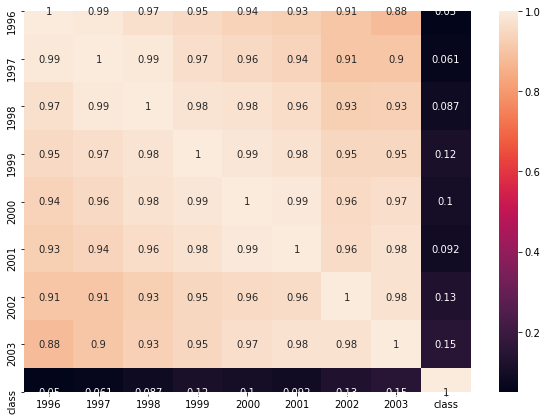

In [444]:
plt.figure(figsize=(10,7))
sns.heatmap(d1.corr(),annot=True)
plt.show()

In [445]:
#2.a)

Based on the correlation table we can apply PCA by seeing the correlation among the independent variables or features. If the correlation among them is >0.5 there there exists multicollinearity or noise in the data set. To remove this noise we use PCA and reduce the dimensions among the features. So this reduces the noise or multicollinearity in the data set.

In [446]:
#2.b)

Before doing PCA it is important to do standart scaler

In [447]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [448]:
d2=d1['class']

In [449]:
d3=pd.DataFrame(d2)

In [450]:
d1.drop('class',axis=1,inplace=True)

In [451]:
df_catcols_only=df_catcols_only.apply(LabelEncoder().fit_transform)

In [452]:
df_catcols_only

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,2004,2005,2006,2007
0,123,90,87,91,86,84,80,33,23,21,24
1,25,27,26,27,28,31,32,66,64,64,60
2,69,116,116,119,113,3,8,13,12,9,8
3,100,66,57,42,35,27,27,4,9,6,11
4,128,84,82,93,89,74,77,60,57,57,76
...,...,...,...,...,...,...,...,...,...,...,...
145,119,63,63,63,62,57,58,71,69,72,72
146,149,72,75,80,79,83,89,73,68,65,56
147,126,6,3,108,106,105,106,6,12,12,15
148,101,71,69,71,69,65,67,45,37,32,28


In [453]:
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(df_numcols_only),columns=df_numcols_only.columns)

In [454]:
#sc = StandardScaler()
#data1 = pd.DataFrame(sc.fit_transform(df_catcols_only),columns=df_catcols_only.columns)

In [455]:
d5=pd.concat([data,df_catcols_only],axis=1)

In [456]:
d5

,1996,1997,1998,1999,2000,2001,2002,2003,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,2004,2005,2006,2007
0,-0.715525,-0.745026,-0.769974,-0.769639,-0.754876,-0.743829,-0.750760,-0.737317,123,90,87,91,86,84,80,33,23,21,24
1,0.351309,0.440760,0.541761,0.614251,0.759627,0.872982,1.007569,1.092859,25,27,26,27,28,31,32,66,64,64,60
2,-0.221138,-0.108119,-0.193446,-0.206958,-0.141156,-0.078927,-0.159886,-0.183142,69,116,116,119,113,3,8,13,12,9,8
3,-0.876851,-0.884834,-0.896916,-0.876092,-0.848914,-0.820364,-0.827002,-0.797858,100,66,57,42,35,27,27,4,9,6,11
4,-0.928892,-0.941793,-0.949809,-0.926784,-0.893458,-0.868199,-0.869888,-0.839770,128,84,82,93,89,74,77,60,57,57,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.981002,1.046598,1.128868,1.202277,1.165475,1.169557,1.221999,1.195312,119,63,63,63,62,57,58,71,69,72,72
146,2.177938,2.278987,2.382421,2.383399,2.343421,2.365424,1.574618,1.367618,149,72,75,80,79,83,89,73,68,65,56
147,-0.496954,-0.439517,-0.346834,-0.328619,-0.344079,-0.346801,-0.350490,-0.299565,126,6,3,108,106,105,106,6,12,12,15
148,1.236001,1.217476,1.224074,1.182001,1.130829,1.054754,0.902736,0.794815,101,71,69,71,69,65,67,45,37,32,28


In [457]:
from sklearn.decomposition import PCA

In [458]:
pca=PCA()
pca.fit(d5)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [459]:
data_pca= pca.transform(d5)
data_pca.shape

(150, 19)

In [460]:
pca.components_

array([[-1.76430357e-03, -1.84016297e-03, -1.75542393e-03,
        -1.45172460e-03, -1.58982545e-03, -1.48986207e-03,
        -5.56897339e-04, -7.70285207e-04, -1.01642102e-01,
        -3.80423254e-01, -3.94153862e-01, -4.16217964e-01,
        -4.09426613e-01, -3.99592766e-01, -3.85306262e-01,
        -1.09191297e-01, -1.06093791e-01, -1.08024770e-01,
        -7.56412809e-02],
       [-1.21050955e-04, -7.29688495e-04, -8.83054722e-04,
        -1.26996175e-03, -1.43365573e-03, -1.76529578e-03,
        -1.55474666e-03, -2.19207072e-03,  2.41650983e-01,
         1.46675968e-01,  1.49619877e-01,  1.10493931e-01,
         6.69974252e-02,  3.01093711e-03, -7.03052401e-02,
        -4.84926156e-01, -4.61815028e-01, -4.61920171e-01,
        -4.62864261e-01],
       [-1.77078773e-03, -1.87905024e-03, -2.22687710e-03,
        -2.39431020e-03, -2.41401173e-03, -2.63440550e-03,
        -2.17230724e-03, -1.99688413e-03, -9.62267853e-01,
         9.02605304e-02,  3.43907161e-02,  1.04571988e-01,
    

In [461]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.42679027, 0.71452142, 0.84076803, 0.90519339, 0.93579796,
       0.95700237, 0.97081626, 0.98061644, 0.98942699, 0.99512107,
       0.99944091, 0.99997893, 0.99999225, 0.99999593, 0.99999754,
       0.99999876, 0.99999945, 0.99999981, 1.        ])

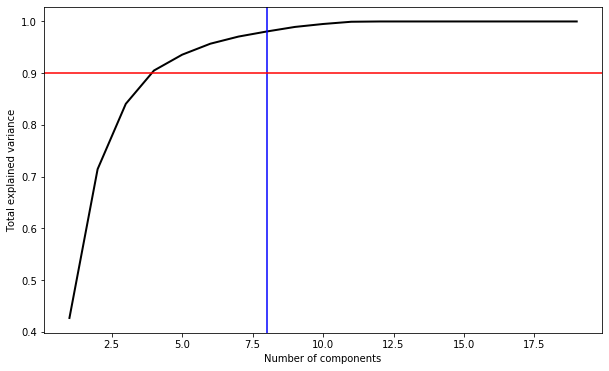

In [462]:
plt.figure(figsize=(10,6))

plt.plot(range(1,20), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [463]:
pca = PCA(n_components=8)
pca.fit(d5)
data_pca = pd.DataFrame(pca.transform(d5))
data_pca.shape

(150, 8)

In [464]:
data_pca 

,0,1,2,3,4,5,6,7
0,-56.007632,81.403986,-23.487025,5.298809,-3.605092,1.959022,-4.994978,-0.922799
1,76.684264,-39.865941,32.805986,-2.637900,-0.668287,-2.342050,1.958912,-7.073141
2,-28.589162,113.949660,34.946936,-85.434765,56.832860,5.378515,25.058925,-7.153861
3,59.015208,96.035874,-8.953396,-19.547842,-7.498722,4.817567,-1.615279,4.251088
4,-63.547162,12.095443,-45.179628,-7.844634,12.562136,1.620555,-2.230484,16.440108
...,...,...,...,...,...,...,...,...
145,-13.314465,-15.815321,-48.924984,-11.290432,3.701148,-0.079175,-1.265606,1.797484
146,-59.045380,5.588761,-69.512203,9.928425,-4.057466,5.412622,-2.293359,-7.836636
147,-19.157674,85.185703,-26.371812,118.076249,48.585803,3.868065,-15.292257,-0.967197
148,-15.870452,48.880770,-13.538097,2.843592,-3.823844,3.901022,-0.998096,-8.411474


95 percent of data consists 8 components.

In [465]:
data_pca1=data_pca.copy()

In [466]:
#3.a)

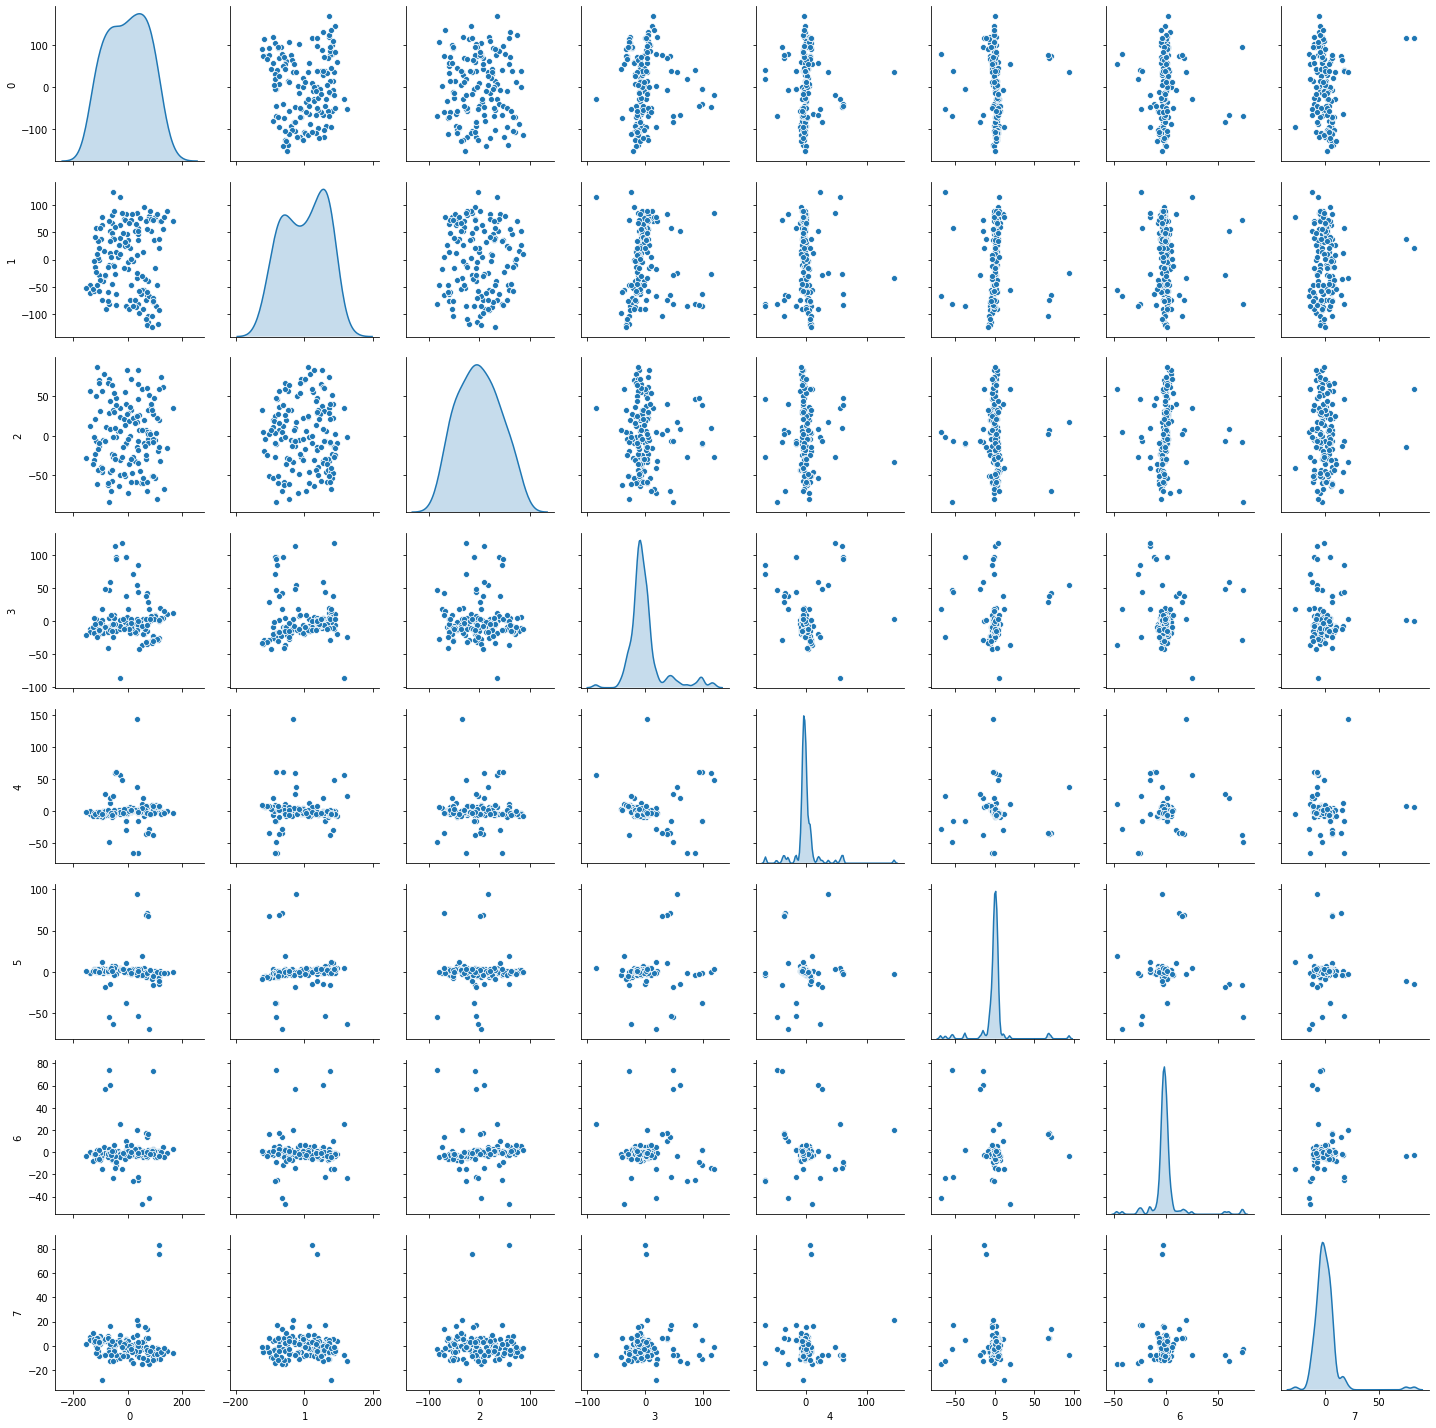

In [483]:
sns.pairplot(data_pca1,diag_kind='kde')

# From the above pairplot we can see that minimul numer of clusters are three so we can infer that from the pair plot results the optimal number of k_values is 3 and the plot also showing more than 3 clusters. Lets check below by using clustering.

In [ ]:
#3.b)

# KMEANS Clustering

In [467]:
from sklearn.cluster import KMeans

In [468]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10, max_iter=100)
    clusters.fit(data_pca)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,1.995628e+06
1,2,1.342985e+06
2,3,9.945741e+05
3,4,8.364048e+05
4,5,7.480547e+05
5,6,6.823666e+05
6,7,6.209355e+05
7,8,5.748545e+05
8,9,5.358257e+05


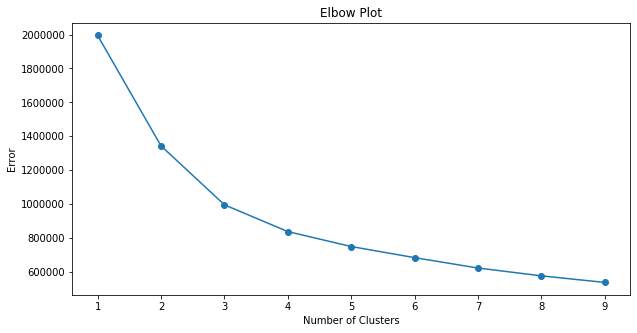

In [469]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

# Agglomerative Clustering :

In [470]:
from scipy.cluster.hierarchy import dendrogram, linkage

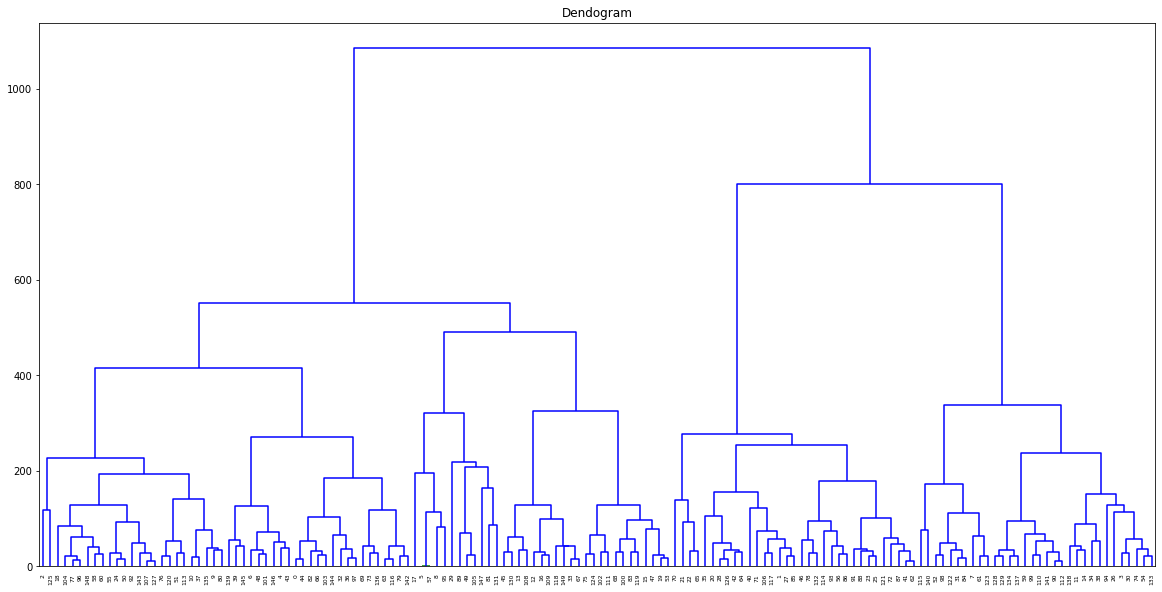

In [471]:
plt.figure(figsize=(20,10))
link = linkage(data_pca, method='ward')
dendrogram(link, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.title('Dendogram')
plt.show()

The optimal K-value from Kmeans and Agglomerative Clustering is 3

In [472]:
#3.b)

# Convert Unsupervised data into Supervised data :

In [477]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(data_pca)
data_pca['label'] = kmeans.labels_
data_pca

,0,1,2,3,4,5,6,7,label
0,-56.007632,81.403986,-23.487025,5.298809,-3.605092,1.959022,-4.994978,-0.922799,1
1,76.684264,-39.865941,32.805986,-2.637900,-0.668287,-2.342050,1.958912,-7.073141,0
2,-28.589162,113.949660,34.946936,-85.434765,56.832860,5.378515,25.058925,-7.153861,2
3,59.015208,96.035874,-8.953396,-19.547842,-7.498722,4.817567,-1.615279,4.251088,2
4,-63.547162,12.095443,-45.179628,-7.844634,12.562136,1.620555,-2.230484,16.440108,1
...,...,...,...,...,...,...,...,...,...
145,-13.314465,-15.815321,-48.924984,-11.290432,3.701148,-0.079175,-1.265606,1.797484,1
146,-59.045380,5.588761,-69.512203,9.928425,-4.057466,5.412622,-2.293359,-7.836636,1
147,-19.157674,85.185703,-26.371812,118.076249,48.585803,3.868065,-15.292257,-0.967197,2
148,-15.870452,48.880770,-13.538097,2.843592,-3.823844,3.901022,-0.998096,-8.411474,2


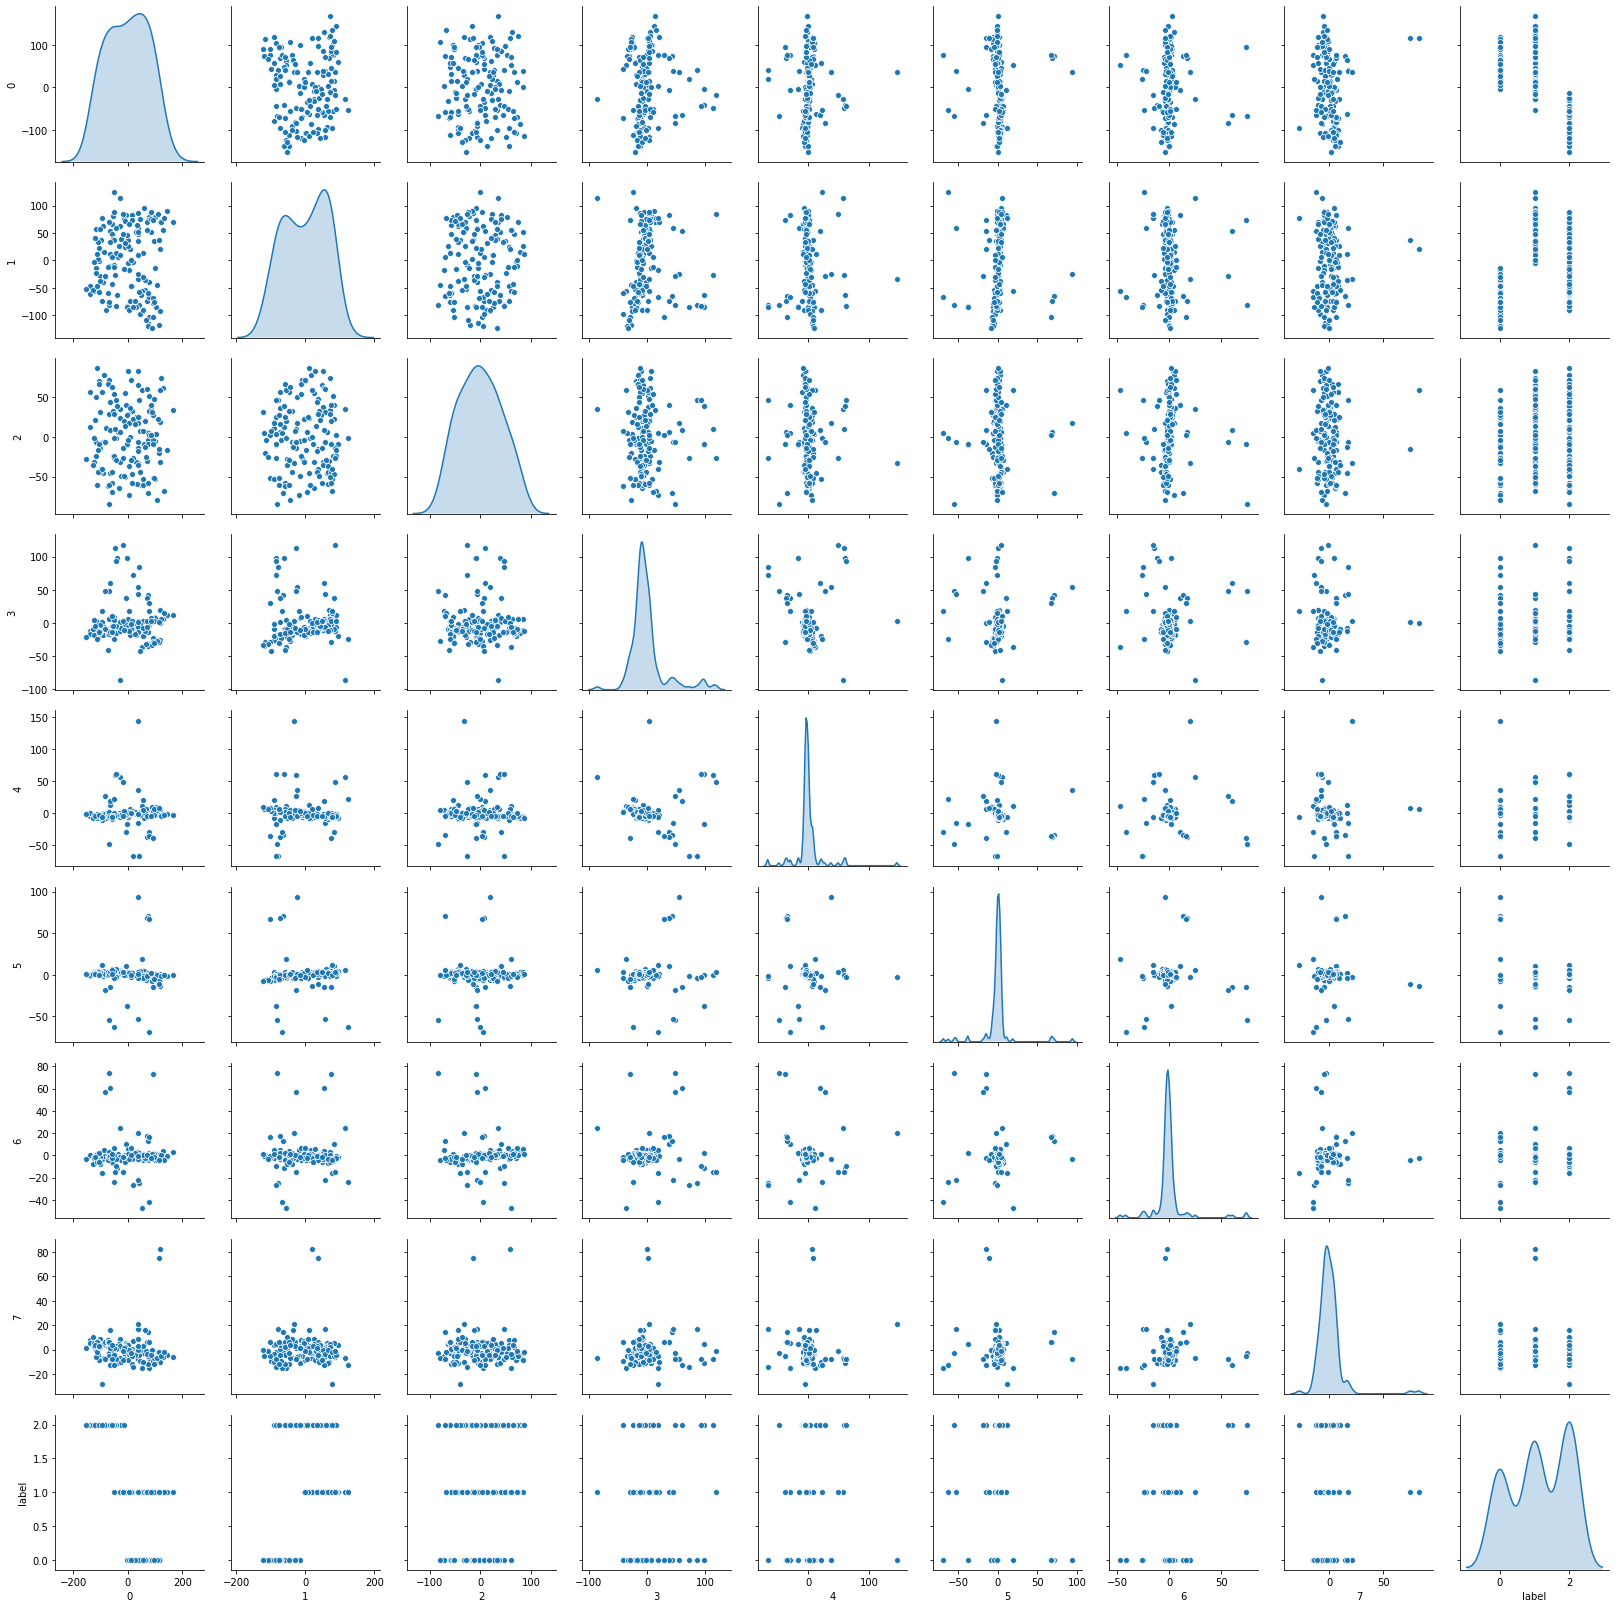

In [347]:
sns.pairplot(data_pca, diag_kind='kde')
plt.show()

In [ ]:
#3.c)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.29071261790883607


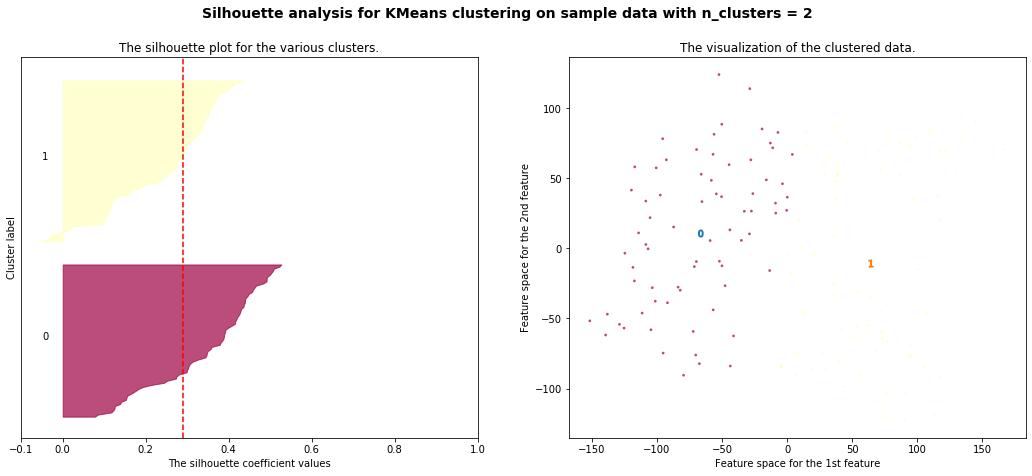

For n_clusters = 3 The average silhouette_score is : 0.3151680714699934


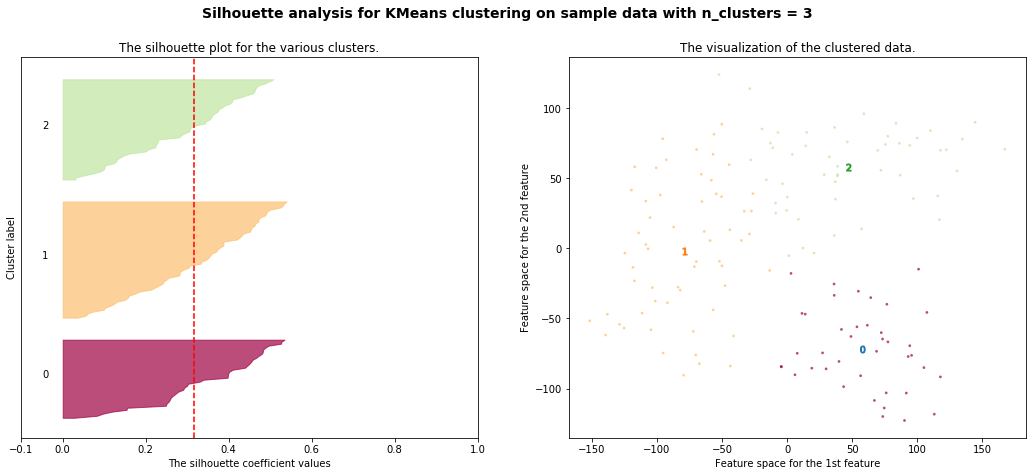

For n_clusters = 4 The average silhouette_score is : 0.2850600584979796


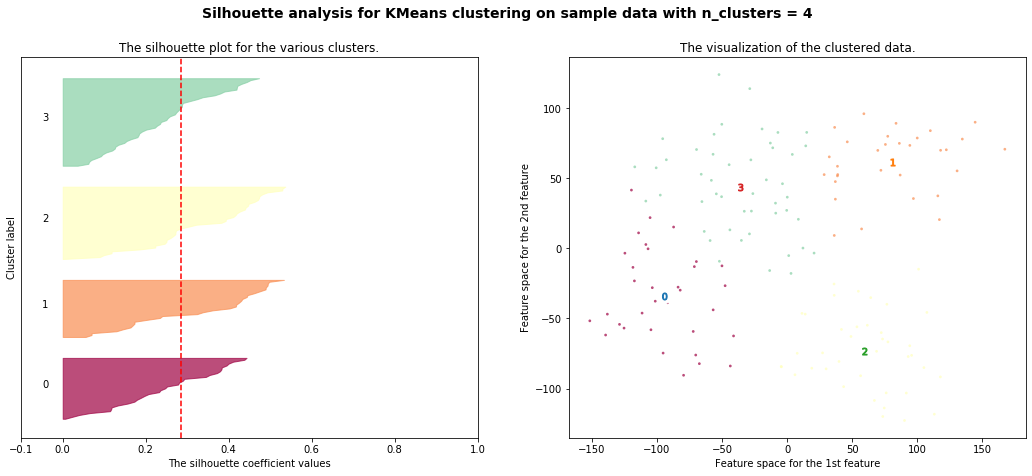

For n_clusters = 5 The average silhouette_score is : 0.3024678405972507


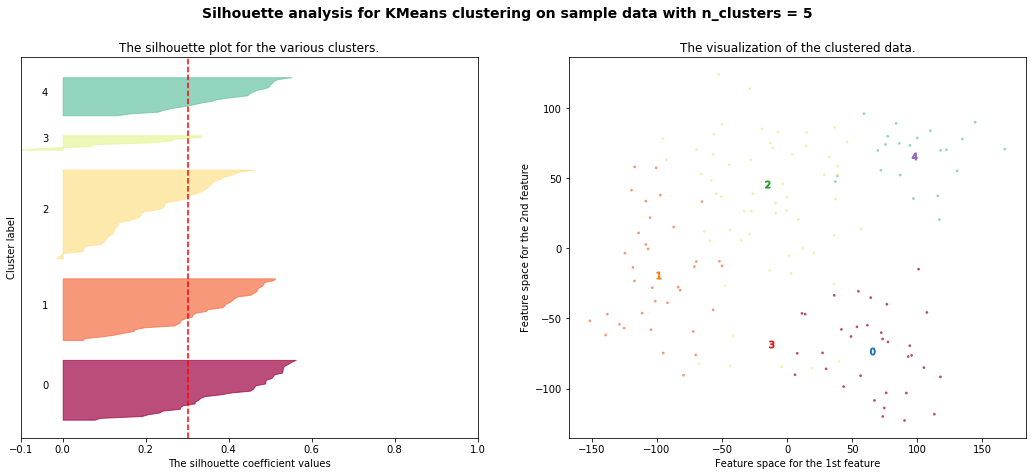

For n_clusters = 6 The average silhouette_score is : 0.2866297257113329


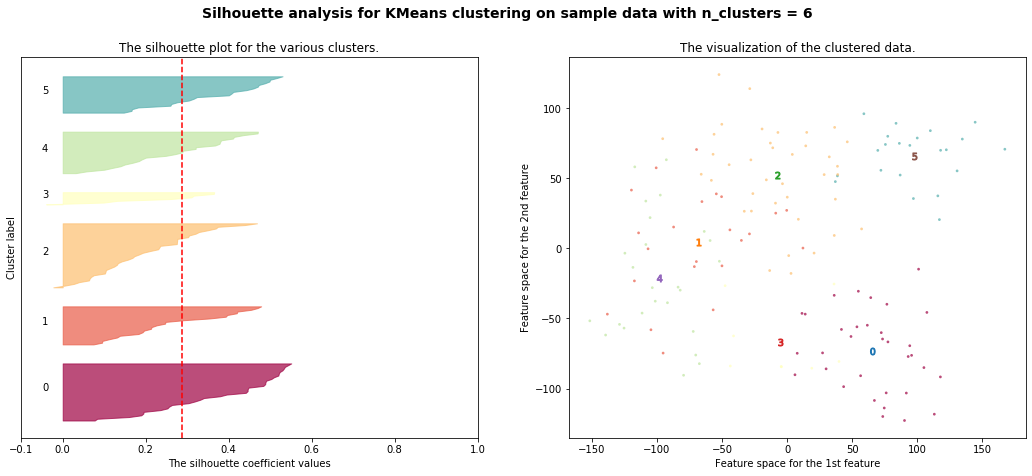

For n_clusters = 7 The average silhouette_score is : 0.27040658194728984


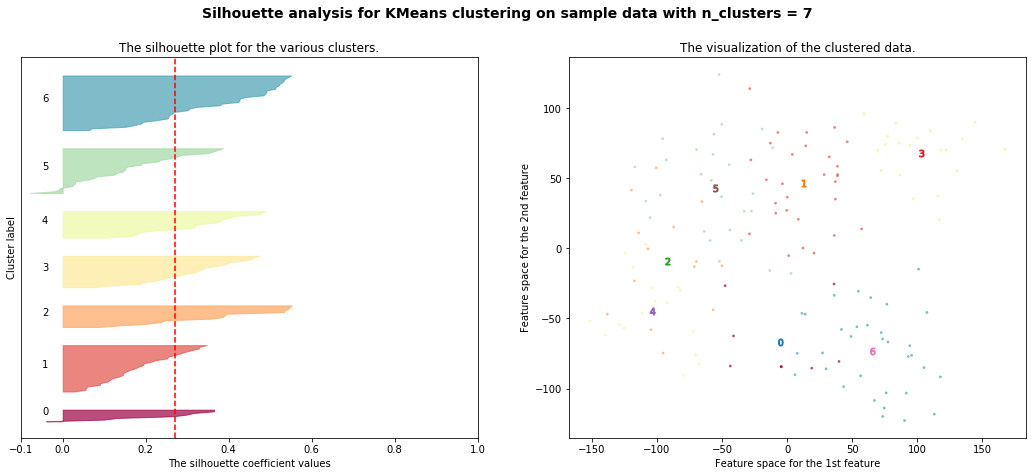

For n_clusters = 8 The average silhouette_score is : 0.27577397730346975


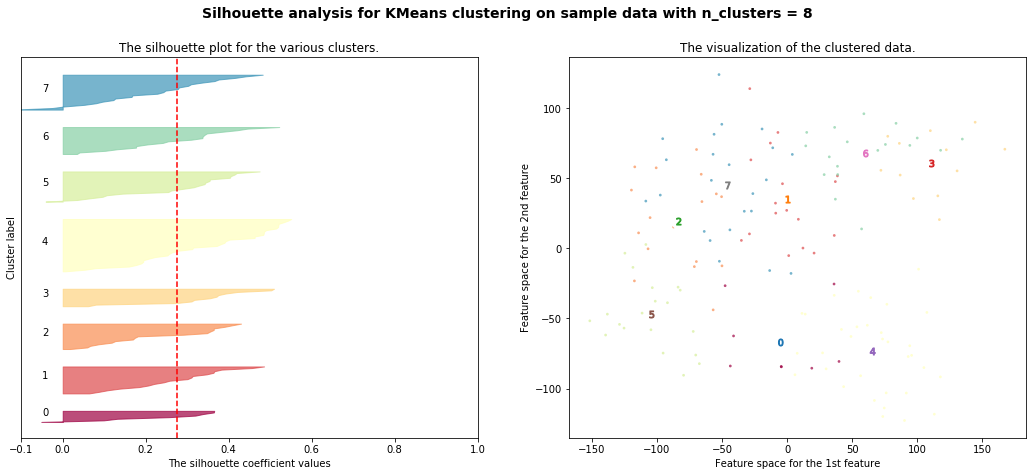

For n_clusters = 9 The average silhouette_score is : 0.251293857345712


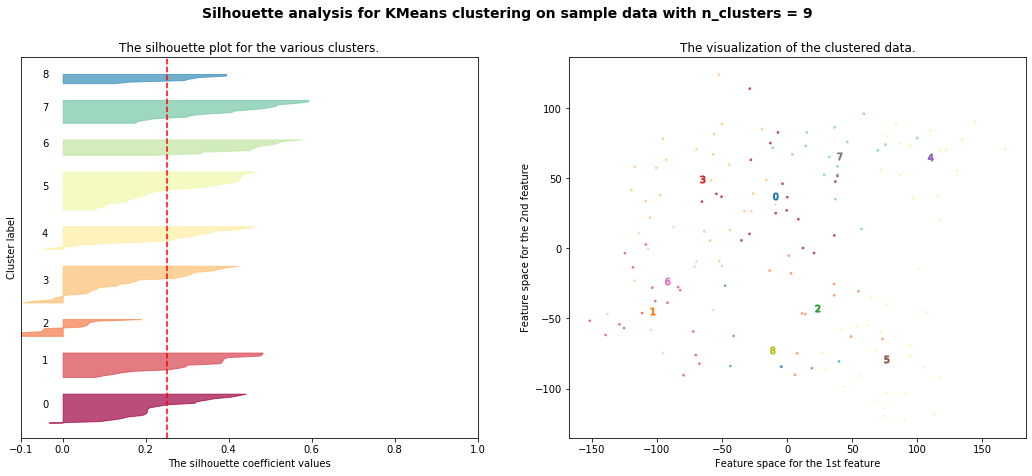

For n_clusters = 10 The average silhouette_score is : 0.24180393484039703


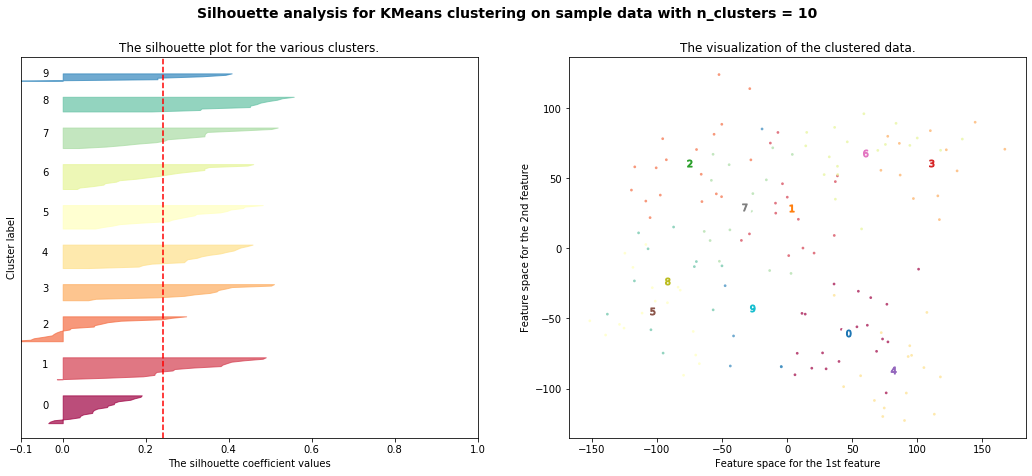

In [475]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=data_pca1.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# we can also observe three clusters from silhoute analysis. silhoute analysis is the appropriate metrics to support the model built(Kmeans, agglomerative) and from the comparision both the models the number of clusterd are same as 3.

In [ ]:
#4.a)

# Convert Unsupervised data into Supervised classification :

Splitting the data after PCA :

In [485]:
df1=data_pca.copy()

In [488]:
from sklearn.model_selection import train_test_split

In [486]:
X1=df1.drop(columns='label')
y1=df1['label']

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 8)
(45, 8)
(105,)
(45,)


In [ ]:
#4.b)

In [ ]:
Combinedly, train and test data represents entire data.
# But, train and test individually may or may not contain all characteristics of data.
# If the train set is more than test set then it may represent better characters than test set. But lets check through p-value
#H0: train=test (Tain and test data have equal statistics)
#H1:train!=test (Tain and test data have un-equal statistics)

In [538]:
st.ttest_ind(X_train,y_train).pvalue.mean()

0.6199940642108039

In [ ]:
alpha=0.05 #(Level of sighificance)
alpha>pvalue
#Conclusion: Reject alternative hypotheis. As, the p-value is greater than alpha.
#So, In this case Tain and test data have equal statistics)

In [ ]:
#4.c)

# In case of a Supervised Machine Learning Problem, we will decide when to apply Based on the correlation table we can apply PCA by seeing the correlation among the independent variables or features. If the correlation among them is >0.5 there there exists multicollinearity or noise in the data set. To remove this noise we use PCA and reduce the dimensions among the features. So this reduces the noise or multicollinearity in the data set.

# Model building after performing PCA

# Logistic Regression :

In [562]:
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [563]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)
print('Training score =', lr_pca.score(X_train, y_train))
print('Test score =', lr_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.9555555555555556


In [564]:
ypred1=lr_pca.predict(X_test)

In [555]:
acc1=(metrics.accuracy_score(y_test,ypred1))
acc1

0.9555555555555556

# Decision Tree Classifier :

In [517]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [518]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train, y_train)
print('Training score =', dt_pca.score(X_train, y_train))
print('Test score =', dt_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.9555555555555556


In [566]:
ypred2=dt.predict(Xtest)

In [567]:
acc2=(metrics.accuracy_score(ytest,ypred2))
acc2

0.9111111111111111

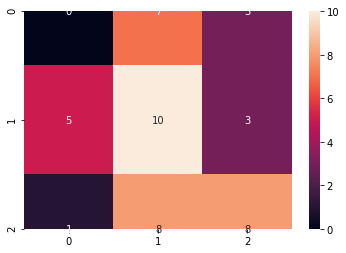

In [568]:
cm = confusion_matrix(y_test, ypred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# KNN:

In [519]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    accuracy=metrics.accuracy_score(ypred,y_test)
    score.append(accuracy*100)

In [520]:
score.index(max(score))+1

6

In [521]:
(max(score))

100.0

In [522]:
knn_pca = KNeighborsClassifier(n_neighbors=6)
knn_pca.fit(X_train, y_train)

print('Training score =', knn_pca.score(X_train, y_train))
print('Test score =', knn_pca.score(X_test, y_test))

Training score = 0.9714285714285714
Test score = 1.0


# Naive Bayes :

In [523]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train, y_train)
print('Training score =', gnb_pca.score(X_train, y_train))
print('Test score =', gnb_pca.score(X_test, y_test))

Training score = 0.9142857142857143
Test score = 0.9111111111111111


In [539]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[1.0,1.00,0.97,0.91]
Test_Accuracy=[0.95,0.95,1.0,0.91] 

In [540]:
After_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
After_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,1.00,0.95
1,Decision Tree,1.00,0.95
2,KNN,0.97,1.00
3,Naive Bayes,0.91,0.91


# Model building before performing PCA

In [524]:
X=d5
y=d2

In [525]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(105, 19)
(45, 19)
(105,)
(45,)


# LogisticRegression

In [526]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [527]:
print('Training score =', lr.score(Xtrain, ytrain))
print('Test score =', lr.score(Xtest, ytest))

Training score = 0.9333333333333333
Test score = 0.8444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(X1)
cm = confusion_matrix(y, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# DecisionTree

In [528]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 1.0
Test score = 0.9111111111111111


# KNeighborsClassifier

In [529]:
from sklearn.neighbors import KNeighborsClassifier

score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    ypred3=knn.predict(Xtest)
    accuracy=metrics.accuracy_score(ypred3,ytest)
    score.append(accuracy*100)

In [530]:
score.index(max(score))+1

49

In [531]:
round(max(score))

71.0

In [532]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.7142857142857143
Test score = 0.7111111111111111


# GaussianNB

In [533]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

print('Training score =', gnb.score(Xtrain, ytrain))
print('Test score =', gnb.score(Xtest, ytest))

Training score = 0.9809523809523809
Test score = 0.9777777777777777


In [541]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[0.93,1.00,0.714,0.98]
Test_Accuracy=[0.84,0.91,0.711,0.97]

In [542]:
Before_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Before_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.930,0.840
1,Decision Tree,1.000,0.910
2,KNN,0.714,0.711
3,Naive Bayes,0.980,0.970


# From above outputs, it is evident that after applying PCA the model performance is boosted a lot .Optained 95% accuracy with PCA applied on Descison tree. Whereas, without PCA, Decision tree gave 91% accuracy. So, PCA helps to build models with high accuracy.

In [ ]:
#5.a) 

# Clustering Comparision

we can also observe three clusters from silhoute analysis. silhoute analysis is the appropriate metrics to support the model built(Kmeans, agglomerative) and from the comparision both the models the number of clusterd are same as 3.

# Models Comparision before and after pca

In [544]:
Algorithm=['LR BPCA','DT BPCA','KNN BPCA','NB BPCA','LR APCA','DT APCA','KNN APCA','NB APCA']
Train_Accuracy=[0.93,1.00,0.714,0.98,1.0,1.00,0.97,0.91]
Test_Accuracy=[0.84,0.91,0.711,0.97,0.95,0.95,1.0,0.91]

In [545]:
Final = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Final

,Algorithm,Train_Accuracy,Test_Accuracy
0,LR BPCA,0.930,0.840
1,DT BPCA,1.000,0.910
2,KNN BPCA,0.714,0.711
3,NB BPCA,0.980,0.970
4,LR APCA,1.000,0.950
5,DT APCA,1.000,0.950
6,KNN APCA,0.970,1.000
7,NB APCA,0.910,0.910


In [ ]:
#BPCA indicates BEFORE PCA
#APCA indicates AFTER PCA

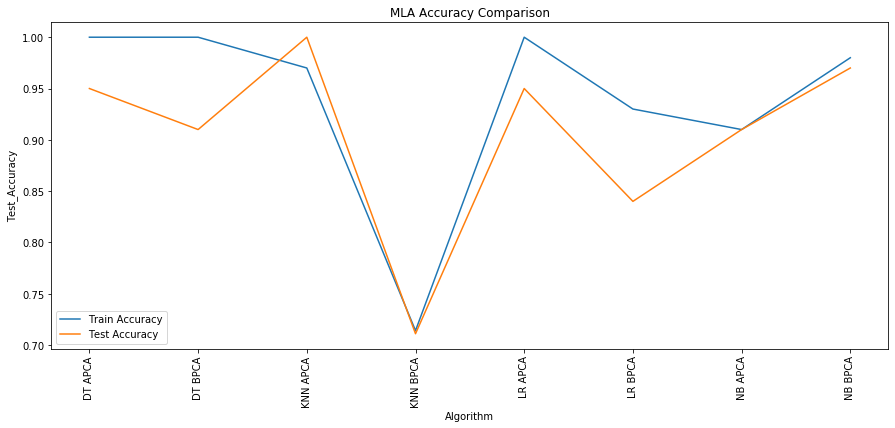

In [547]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="Algorithm", y="Train_Accuracy",data=Final,palette='hot',label='Train Accuracy')
sns.lineplot(x="Algorithm", y="Test_Accuracy",data=Final,palette='hot',label='Test Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

In [ ]:
#5.b)

# If the business is demanding more accuracy and less interpration then using PCA would be Perfect. If the business is asking for exact figure and better interpration then it's better to go with classification models. The classification will give F1-score,other metrics like precission and recall. So, it is easy to classify using true positive rate and false positive rate to determine which is flasely classified.

In [ ]:
#5.c)

In [571]:
df1.corr()

,0,1,2,3,4,5,6,7,label
0,1.000000e+00,-3.698426e-17,1.472868e-16,2.317835e-16,-3.582888e-16,4.877692e-17,-4.450803e-16,-3.239192e-16,0.006021
1,-3.698426e-17,1.000000e+00,2.485548e-16,6.154589e-17,-1.910945e-16,-1.512186e-16,-2.036347e-16,-3.134985e-16,0.808827
2,1.472868e-16,2.485548e-16,1.000000e+00,-6.398699e-16,1.379542e-16,2.537316e-16,7.340680e-17,-1.175261e-16,0.117402
3,2.317835e-16,6.154589e-17,-6.398699e-16,1.000000e+00,-1.736150e-16,2.381684e-16,-1.768429e-16,1.036581e-16,0.008252
4,-3.582888e-16,-1.910945e-16,1.379542e-16,-1.736150e-16,1.000000e+00,-1.289884e-16,-5.372093e-16,-5.089497e-16,-0.024909
5,4.877692e-17,-1.512186e-16,2.537316e-16,2.381684e-16,-1.289884e-16,1.000000e+00,-3.785612e-16,-4.214031e-16,-0.086271
6,-4.450803e-16,-2.036347e-16,7.340680e-17,-1.768429e-16,-5.372093e-16,-3.785612e-16,1.000000e+00,5.862780e-17,0.048973
7,-3.239192e-16,-3.134985e-16,-1.175261e-16,1.036581e-16,-5.089497e-16,-4.214031e-16,5.862780e-17,1.000000e+00,0.130099
label,6.021107e-03,8.088269e-01,1.174019e-01,8.251785e-03,-2.490877e-02,-8.627101e-02,4.897255e-02,1.300989e-01,1.000000


# After performing PCA if we observe the correlation of features pca component 1,4,4,6 have strong correlation with the target variable. After performing PCA it is difficult to intepret the results and features so it is easy to infer as pca components.

# Before performing PCA 1996,1997,1998 features are having less correlation with the target variable and they are having high correlation among independent variables . So this type of features affect the target variable highly and after performing PCA this is reduced.

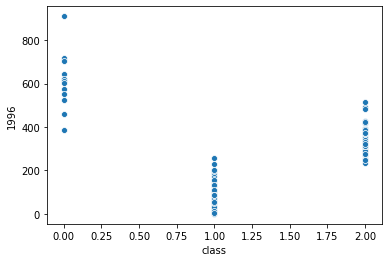

In [575]:
sns.scatterplot(x='class',y='1996',data=d1)

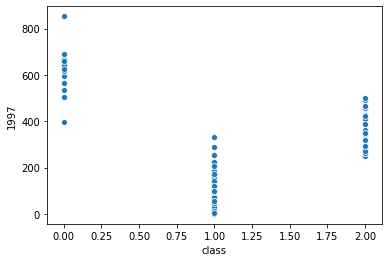

In [576]:
sns.scatterplot(x='class',y='1997',data=d1)

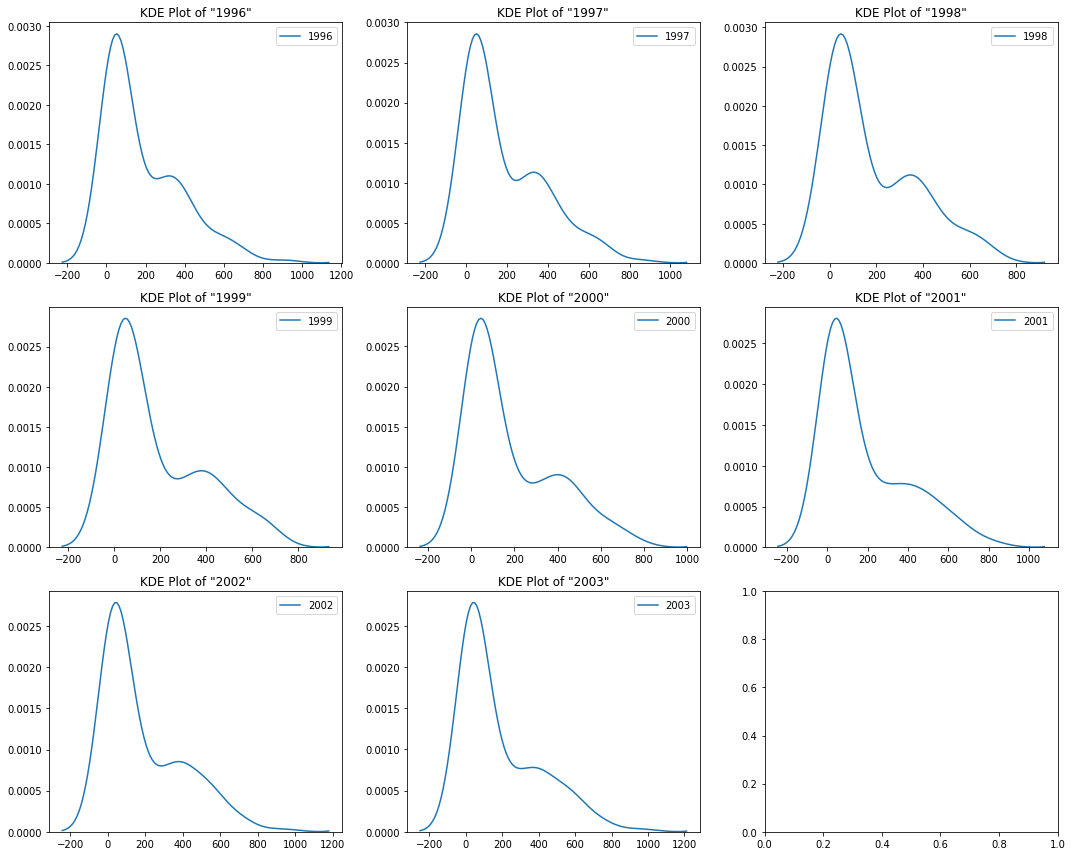

In [577]:
fig,ax = plt.subplots(3,3,figsize=(15,12))
ax = ax.flatten()
for i, column in enumerate(df_numcols_only.columns):
    sns.kdeplot(df_numcols_only[column], ax=ax[i])
    ax[i].set_title('KDE Plot of "' + column + '"')
    
plt.tight_layout()
plt.show()

Linearity is important for the data. In the above charts some data points are not linear so by makin them linear there will be positive effect on the target variable by these features

In [ ]:
#5.d)

# In the base model there is lot of noise in the data as we havent performed any PCA analysis so the accuracy is very low in the logistic regression base model. After performing PCA there is high increase in the accuracy of the data for the base model as after performing pca. 

In [ ]:
#5.e)

# The risks are like there are few FN and FP records from the confusion matrix, there are type-2 error.So by doing pca some type-2 errors are reduced but we have to do feature engineering and add extra features then model prediction will be perfect. At present these are the key risks